In [1]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict,Literal
import random
from IPython.display import display,Image

c:\app\coding\langgraph-hands-on\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
class JourneyState(TypedDict):
    current_location:str

In [4]:
def coimbatore(state: JourneyState) -> JourneyState:
    print("Starting journey from Coimbatore")
    return {"current_location":"Departure from Coimbatore"}

def trichy(state: JourneyState) -> JourneyState:
    print("Starting journey from trichy")
    return {"current_location":"Departure from trichy"}

def salem(state: JourneyState) -> JourneyState:
    print("Starting journey from salem")
    return {"current_location":"Departure from salem"}

In [5]:
def decide_intermediate(state:JourneyState) -> Literal["trichy","salem"]:
    print(f" Deciding route... update: {state['current_location']}")
    if random.random() <0.5:
        print(f" Routing to trichy")
        return "trichy"
    else:
        print(f" Routing to salem")
        return "salem"

In [6]:
builder = StateGraph(JourneyState)
builder.add_node("coimbatore", coimbatore)
builder.add_node("trichy", trichy)
builder.add_node("salem", salem)    

In [7]:
builder.add_edge(START, "coimbatore")
builder.add_conditional_edges("coimbatore",decide_intermediate)

In [8]:
builder.add_edge("trichy", END )
builder.add_edge("salem", END )

In [9]:
graph = builder.compile()

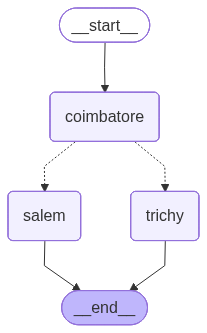

In [10]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"current_location":"coimbatore"})

Starting journey from Coimbatore
 Deciding route... update: Departure from Coimbatore
 Routing to salem
Starting journey from salem


{'current_location': 'Departure from salem'}